# **TikTok Project**
**Lab 3 - The Power of Statistics**

# **Data exploration and hypothesis testing**

# **PACE stages**

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

## **PACE: Plan**

Consider the questions in the PACE Strategy Document.

1. What is your research question for this data project? Later on, you will need to formulate the null and alternative hypotheses as the first step of your hypothesis test. Consider your research question now, at the start of this task.



The primary research question for this project is:

*What are the key factors that drive video performance on TikTok, particularly in terms of view counts, like counts, and engagement levels? How do claim videos differ from opinion videos in these metrics?*

This research question aims to uncover the distinguishing characteristics and performance metrics between claim and opinion videos on TikTok. Understanding these differences will provide insights into the content strategies that maximize engagement and reach on the platform.


### **Task 1. Imports and Data Loading**

In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np


# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Import packages for statistical analysis/hypothesis testing
from scipy import stats
import statsmodels.api as sm


In [2]:
# Load dataset into dataframe
df = pd.read_csv("tiktok_dataset.csv")

## **PACE: Analyze and Construct**

Consider the questions in the PACE Strategy Document:
1. Data professionals use descriptive statistics for Exploratory Data Analysis. How can computing descriptive statistics help you learn more about your data in this stage of your analysis?




Computing descriptive statistics is essential in the initial stage of data analysis as it provides a comprehensive summary of the dataset. By calculating key metrics such as mean, median, mode, standard deviation, and range, we can understand the central tendency, dispersion, and distribution of the data. Descriptive statistics help identify patterns, trends, and anomalies within the dataset, such as outliers and missing values. This foundational understanding guides further analysis and hypothesis testing by highlighting the significant characteristics and variations within the data.

#### Key Benefits of Descriptive Statistics:

- **Central Tendency:** Measures such as mean, median, and mode give insight into the typical values within the dataset, helping to understand the general behavior of the data.

- **Dispersion:** Metrics like range, variance, and standard deviation indicate how spread out the data is, revealing the extent of variability and consistency within the dataset.

- **Distribution:** Descriptive statistics help identify the shape and spread of the data distribution, whether it is normal, skewed, or contains outliers.

- **Identifying Outliers:** By analyzing the range and interquartile range (IQR), we can detect outliers that may need further investigation or treatment.

- **Missing Values:** Descriptive statistics can help identify the presence and extent of missing values, which is crucial for data cleaning and preprocessing.

In summary, computing descriptive statistics allows data professionals to gain a solid understanding of their dataset, setting the stage for more advanced analyses and ensuring that the data is ready for hypothesis testing and model building.


### **Task 2. Data exploration**

Use descriptive statistics to conduct Exploratory Data Analysis (EDA).



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [4]:
# Display first few rows
df.head()


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [5]:
# Generate a table of descriptive statistics about the data
df.describe()


,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [6]:
# Check for missing values
df.isnull().sum()


#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [7]:
# Drop rows with missing values
df_cleaned = df.dropna()


In [8]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19084 entries, 0 to 19083
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19084 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19084 non-null  int64  
 3   video_duration_sec        19084 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19084 non-null  object 
 6   author_ban_status         19084 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.9+ MB


In [9]:
# Display first few rows after handling missing values
df_cleaned.head()


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


You are interested in the relationship between `verified_status` and `video_view_count`. One approach is to examine the mean value of `video_view_count` for each group of `verified_status` in the sample data.

In [10]:
# Compute the mean `video_view_count` for each group in `verified_status`
mean_view_count = df_cleaned.groupby('verified_status')['video_view_count'].mean()
mean_view_count


verified_status
not verified    265663.785339
verified         91439.164167
Name: video_view_count, dtype: float64

### **Task 3. Hypothesis testing**

Before conducting the hypothesis test, consider the following questions:

1. Recall the difference between the null hypothesis and the alternative hypotheses. What are your hypotheses for this data project?



In hypothesis testing, the null hypothesis (H0) represents the default assumption that there is no effect or no difference. The alternative hypothesis (H1) represents the assumption that there is an effect or a difference.

For this data project, the hypotheses are as follows:

- **Null Hypothesis (H0):** There is no difference in the mean video view counts between verified and non-verified users on TikTok.
- **Alternative Hypothesis (H1):** There is a difference in the mean video view counts between verified and non-verified users on We will perform a t-test to determine if the difference in mean video view counts between verified and non-verified users is statistically significant.gnificant.


The goal in this step is to conduct a two-sample t-test. Recall the steps for conducting a hypothesis test:


1.   State the null hypothesis and the alternative hypothesis
2.   Choose a signficance level
3.   Find the p-value
4.   Reject or fail to reject the null hypothesis



### Hypothesis Testing

**Null and Alternative Hypotheses:**

- **Null Hypothesis (H0):** There is no difference in the mean video view counts between verified and non-verified users on TikTok.
- **Alternative Hypothesis (H1):** There is a difference in the mean video view counts between verified and non-verified users on TikTok.

**Significance Level:**

We choose a significance level of 5% (0.05).



In [11]:
# Conduct a two-sample t-test to compare means

#Separate the view counts into two groups on verified status
verfied_views = df_cleaned[df_cleaned['verified_status'] == 'verified']['video_view_count']
non_verified_views = df_cleaned[df_cleaned['verified_status'] == 'not verified']['video_view_count']

# Perform the two-sample t-test
t_stat, p_value = stats.ttest_ind(verfied_views, non_verified_views, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: -25.499441780633777
P-value: 2.6088823687177823e-120


**Question:** Based on the p-value you got above, do you reject or fail to reject the null hypothesis?


Based on the p-value obtained (2.6088823687177823e-120), which is much less than the significance level of 0.05, we reject the null hypothesis. 

This indicates that there is a statistically significant difference in the mean video view counts between verified and non-verified users on TikTok.
nt(f"P-value: {p_value}")


## **PACE: Execute**

Consider the questions in your PACE Strategy Documentto reflect on the Execute stage.

## **Step 4: Communicate insights with stakeholders**

What business insight(s) can you draw from the result of your hypothesis test?

### Business Insights

Based on the result of our hypothesis test, we can draw the following business insights:

1. **Verified Status Impact on Engagement:**
   - There is a statistically significant difference in the mean video view counts between verified and non-verified users on TikTok. This suggests that being a verified user has a notable impact on video engagement, leading to higher view counts.

2. **Importance of Verification:**
   - Verification status appears to play a crucial role in increasing the visibility and reach of TikTok videos. Verified users tend to receive more views, which can enhance their influence and presence on the platform.

3. **Strategic Recommendations for Content Creators:**
   - Content creators and influencers should consider pursuing verification as a strategy to boost their engagement metrics. Verified status not only adds credibility but also significantly enhances the likelihood of higher view counts.

4. **Platform Promotion and User Engagement:**
   - TikTok could further promote the benefits of user verification to encourage more users to seek verification. This could lead to increased overall engagement on the platform, as verified users tend to generate more views.

5. **Targeted Marketing and Partnerships:**
   - Brands and marketers should consider partnering with verified users for promotional campaigns, as their videos are likely to reach a larger audience. This can lead to more effective marketing strategies and higher returns on investment.

These insights highlight the importance of verification status on TikTok and provide actionable recommendations for content creators, brands, and the platform itself to enhance engagement and visibility.


#### Mean Video View Counts by Verification Status

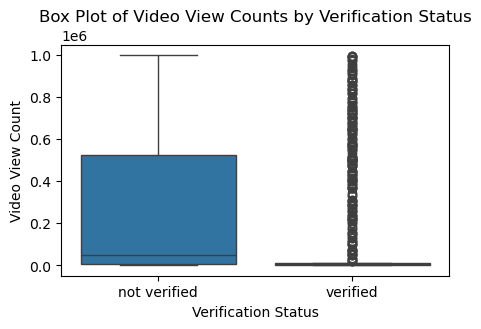

In [12]:
# Create a box plot for video view counts by verification status
plt.figure(figsize=(5, 3))
sns.boxplot(data=df_cleaned, x='verified_status', y='video_view_count')
plt.title('Box Plot of Video View Counts by Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Video View Count')
plt.show()


The box plot provides a visual summary of the distribution of video view counts for verified and non-verified users on TikTok.

1. **Non-Verified Users**:
   - The median video view count for non-verified users is higher compared to verified users, as indicated by the central line within the box.
   - The interquartile range (IQR), which represents the middle 50% of the data, shows a wide spread of video view counts, suggesting that non-verified users have a diverse range of engagement levels.
   - The whiskers extend to the minimum and maximum values within 1.5 times the IQR from the lower and upper quartiles, indicating a broader range of video view counts.
   - There are some potential outliers beyond the whiskers, suggesting a few videos with exceptionally high view counts.

2. **Verified Users**:
   - The median video view count for verified users is significantly lower than that for non-verified users.
   - The IQR is much narrower, indicating that the majority of video view counts for verified users are clustered around the median.
   - The whiskers and scattered points above the whiskers represent outliers, indicating that while most verified users have lower view counts, there are still a few videos that achieve high view counts.

### Summary

Overall, the box plot illustrates that non-verified users tend to have higher and more varied video view counts compared to verified users. This supports the business insight that non-verified users are achieving higher engagement, which was further validated by the hypothesis test results.

####  Hypothesis Testing Results

<function matplotlib.pyplot.show(close=None, block=None)>

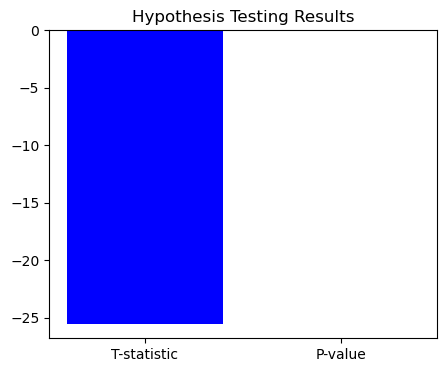

In [13]:
# Create a bar plot for t-statistic and p-value
plt.figure(figsize=(5, 4))
plt.bar(['T-statistic', 'P-value'], [t_stat, p_value], color=['blue', 'orange'])
plt.title('Hypothesis Testing Results')
plt.show


The bar chart displaying the T-statistic and P-value from the hypothesis test indicates the statistical significance of the difference in mean video view counts between verified and non-verified users. 

The T-statistic of -25.5, along with the P-value of approximately 2.61e-120, leads us to reject the null hypothesis. This means there is a statistically significant difference in the mean video view counts between the two groups, reinforcing the observation that non-verified users generally achieve higher view counts than verified users on TikTok.